In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 删除缺失值过多的列
data.drop(['Name', 'Cabin', 'Ticket'], inplace=True, axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [7]:
# 用年龄的平均值填补缺失的年龄
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [8]:
# 删除缺失值的行
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [10]:
# 将二分类变量sex转化成数值变量
data['Sex'] = (data['Sex'] == 'male').astype('int')

In [11]:
# 将三分类变量Embarked转化成数值型变量
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [13]:
# 提取特征和标签，划分训练集和测试集
x = data.iloc[:, data.columns != 'Survived']
y = data.iloc[:, data.columns == 'Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
25,26,3,0,38.000000,1,5,31.3875,0
675,676,3,1,18.000000,0,0,7.7750,0
845,846,3,1,42.000000,0,0,7.5500,0
93,94,3,1,26.000000,1,2,20.5750,0
192,193,3,0,19.000000,1,0,7.8542,0
461,462,3,1,34.000000,0,0,8.0500,0
638,639,3,0,41.000000,0,5,39.6875,0
196,197,3,1,29.699118,0,0,7.7500,2
217,218,2,1,42.000000,1,0,27.0000,0
752,753,3,1,33.000000,0,0,9.5000,0


In [16]:
# 修正训练集和测试集的索引
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [17]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,26,3,0,38.0,1,5,31.3875,0
1,676,3,1,18.0,0,0,7.7750,0
2,846,3,1,42.0,0,0,7.5500,0
3,94,3,1,26.0,1,2,20.5750,0
4,193,3,0,19.0,1,0,7.8542,0


In [19]:
# 导入模型
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score v   

0.7303370786516854

0.8143896833503576


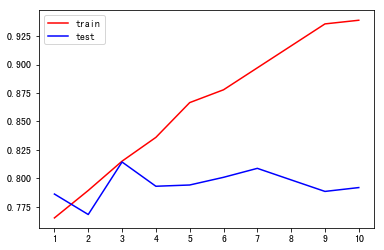

In [22]:
# 探索不同max_depth的拟合情况
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(max_depth=i+1, random_state=30)
    clf.fit(X_train, y_train)
    score_tr = clf.score(X_train, y_train)
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))

plt.plot(range(1,11), tr, color='red', label='train')
plt.plot(range(1,11), te, color='blue', label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [30]:
# 网格搜索调整参数

import numpy as np

parameters = {
    'criterion': ('gini', 'entropy'),
    'splitter':('best', 'random'),
    'max_depth':[*range(1,10)],
    'min_samples_leaf':[*range(1,50,5)],
    'min_impurity_decrease':[*np.linspace(0, 0.5, 20)]
}

clf = DecisionTreeClassifier(random_state=30)
GS = GridSearchCV(clf, parameters,cv=10)
GS.fit(X_train, y_train)


/Users/jockie/install_programs/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=30,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46], 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.131...0526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [33]:
GS.best_score_

0.8231511254019293